In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6  

In [4]:
df1_6 = pd.read_csv('../data_/data_ana/radar_count_2022_01_06.csv')
df1_7_12 = pd.read_csv('../data_/data_ana/radar_count_2022_07_12.csv')

# join two dataframes
df = pd.concat([df1_6, df1_7_12], ignore_index=True)

# sort by time_index
df = df.sort_values(by=['time_index'])
df.isnull().sum()   # no missing values

time_index            0
entity_id             0
faixa                 0
vehiclelight          0
speedlight            0
vehicleheavy          0
speedheavy            0
vehicleothers         0
speedothers           0
accelerationlight     0
accelerationheavy     0
accelerationothers    0
dtype: int64

In [5]:
# drop 
df.drop(['speedlight', 'speedheavy', 'speedothers', 'accelerationlight', 'accelerationheavy', 'accelerationothers'], axis=1, inplace=True)

# only for radar 35
df = df[df['entity_id'] == 'urn:ngsi-ld:Count:aveiro_radar:p35']

# create another column thats the sum of all vehicles
df['total'] = df['vehiclelight'] + df['vehicleheavy'] + df['vehicleothers']

df

,time_index,entity_id,faixa,vehiclelight,vehicleheavy,vehicleothers,total
689858,2022-01-11 17:22:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,20,0,0,20
689859,2022-01-11 17:22:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,2,13,0,3,16
689862,2022-01-11 17:23:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,9,0,1,10
689863,2022-01-11 17:23:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,2,6,0,4,10
689866,2022-01-11 17:24:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,12,2,2,16
...,...,...,...,...,...,...,...
1510283,2022-12-31 23:55:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,2,1,0,0,1
1510282,2022-12-31 23:56:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,2,0,0,2
1510281,2022-12-31 23:57:00+00,urn:ngsi-ld:Count:aveiro_radar:p35,1,1,0,0,1
1510280,2022-12-31 23:57:01+00,urn:ngsi-ld:Count:aveiro_radar:p35,2,0,0,2,2


In [ ]:
# plot
plt.plot(df['time_index'], df['total'])
plt.xlabel('Time')
plt.ylabel('Total number of vehicles')
plt.title('Total number of vehicles detected by radar 35')
plt.show()


In [40]:
# lets agregate by month
df['time_index'] = pd.to_datetime(df['time_index'])
df['month'] = df['time_index'].dt.month

df = df.groupby(['month']).sum()
df

,faixa,vehiclelight,vehicleheavy,vehicleothers,total
month,,,,,
1,59661,252250,17452,35692,305394
2,97611,420105,32816,53815,506736
3,108055,461427,39586,93841,594854
4,103524,429103,38798,77636,545537
5,88887,387317,36052,85064,508433
6,39715,169884,16791,44747,231422
7,72438,301505,27981,62335,391821
8,85167,344381,29013,62919,436313
9,89252,351926,33860,84699,470485


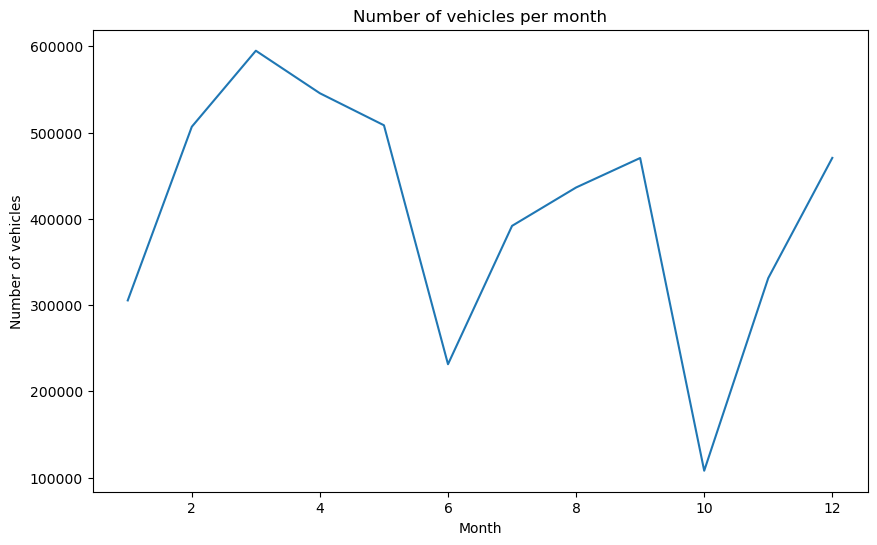

In [41]:
# plot
plt.xlabel('Month')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per month')
plt.plot(df.index, df['total'])

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be 

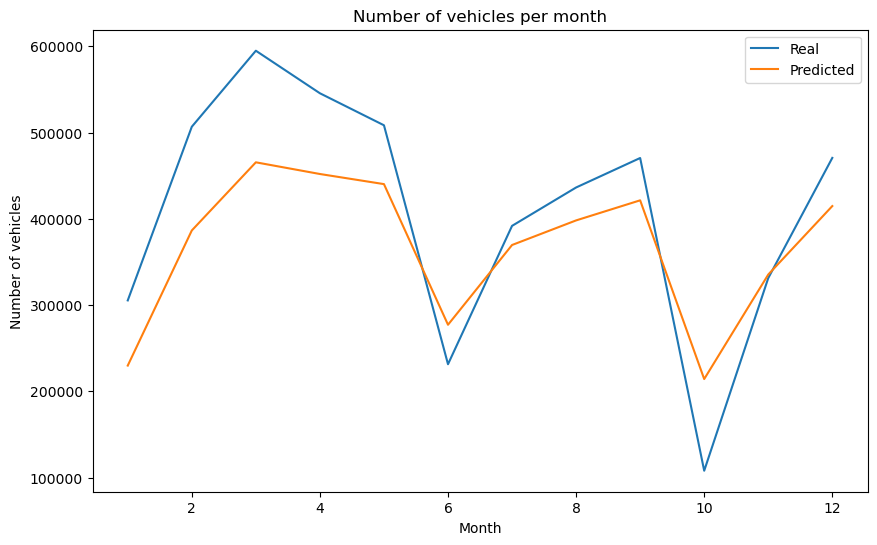

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


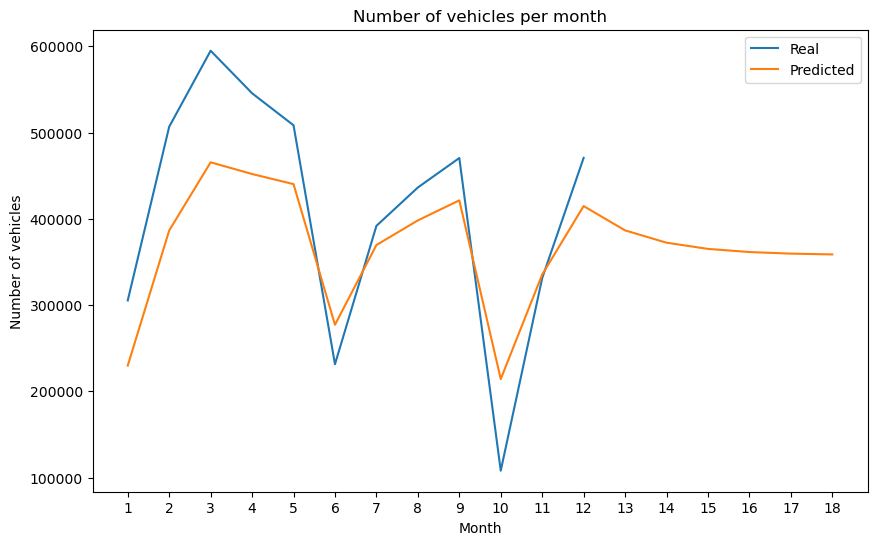

In [52]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df['total'], order=(1, 1, 1))
model_fit = model.fit()

# for each month, make a prediction
yhat = model_fit.predict(start=1, end=12)

# plot
plt.xlabel('Month')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per month')

plt.plot(df.index, df['total'])
plt.plot(df.index, yhat)
plt.legend(['Real', 'Predicted'])
plt.show()

# predict for the next 6 months
yhat = model_fit.predict(start=1, end=18)

# plot
plt.xlabel('Month')
# make x axis go from 1 to 18
plt.xticks(range(1, 19))
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per month')

plt.plot(df.index, df['total'])
plt.plot(range(1, 19), yhat)
plt.legend(['Real', 'Predicted'])
plt.show()






In [ ]:
# as we can see the model is not very good, but it is a start
# lets try to agregate by week
df['time_index'] = pd.to_datetime(df['time_index'])
df['week'] = df['time_index'].dt.week # type: ignore

df = df.groupby(['week']).sum()


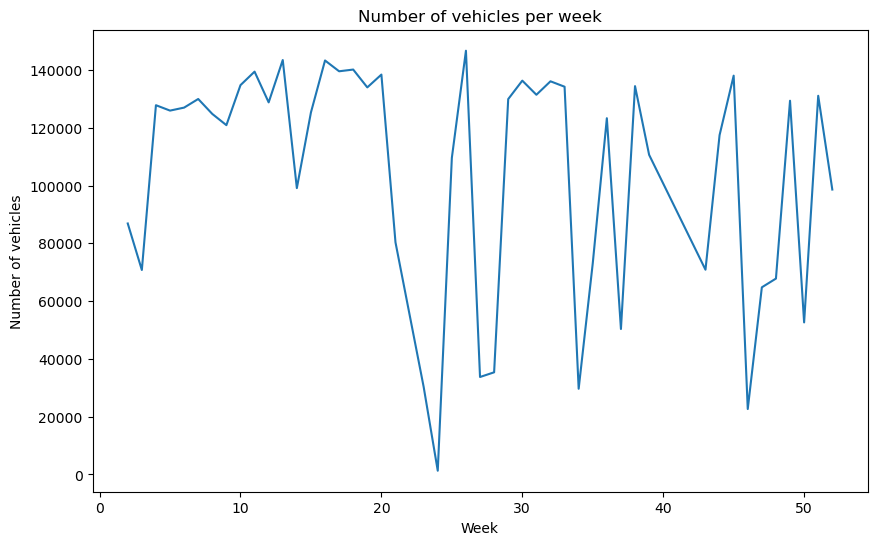

In [65]:
# plot
plt.xlabel('Week')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per week')
plt.plot(df.index, df['total'])
plt.show()


c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


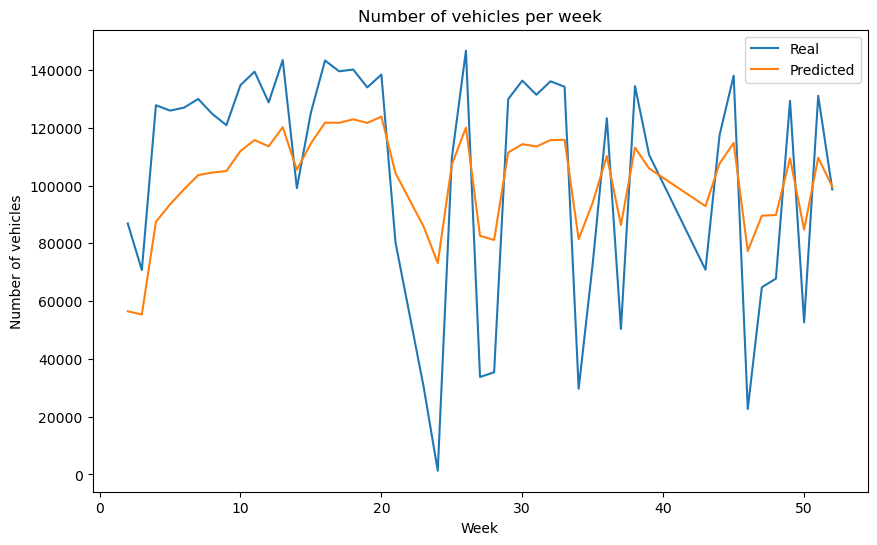

In [90]:
# fit model
model = ARIMA(df['total'], order=(1, 1, 1))
model_fit = model.fit()

# for each week, make a prediction
yhat = model_fit.predict(start=1, end=47)

# plot
plt.xlabel('Week')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per week')

plt.plot(df.index, df['total'])
plt.plot(df.index, yhat)
plt.legend(['Real', 'Predicted'])
plt.show()



Text(0.5, 1.0, 'Number of vehicles per week')

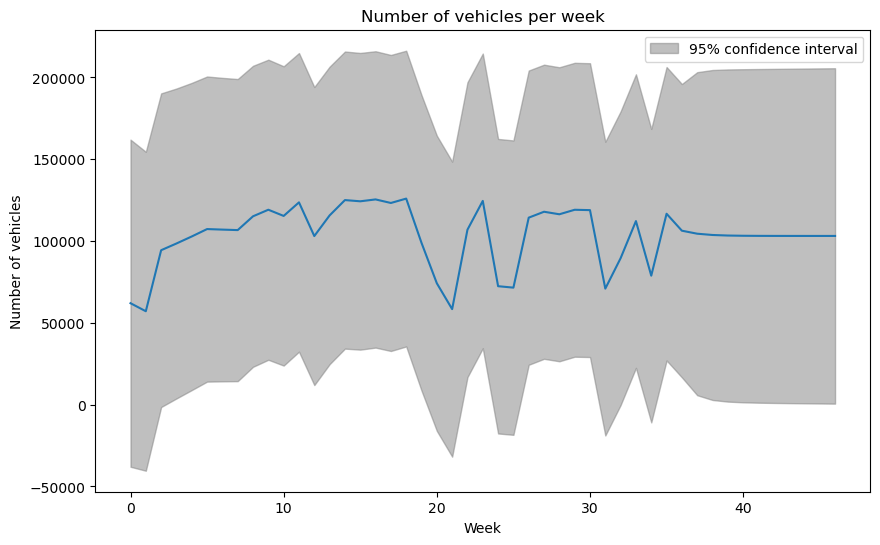

In [101]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

plot_predict(model_fit, start=1, end=47)
plt.xlabel('Week')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per week')




Text(0.5, 1.0, 'Number of vehicles per week')

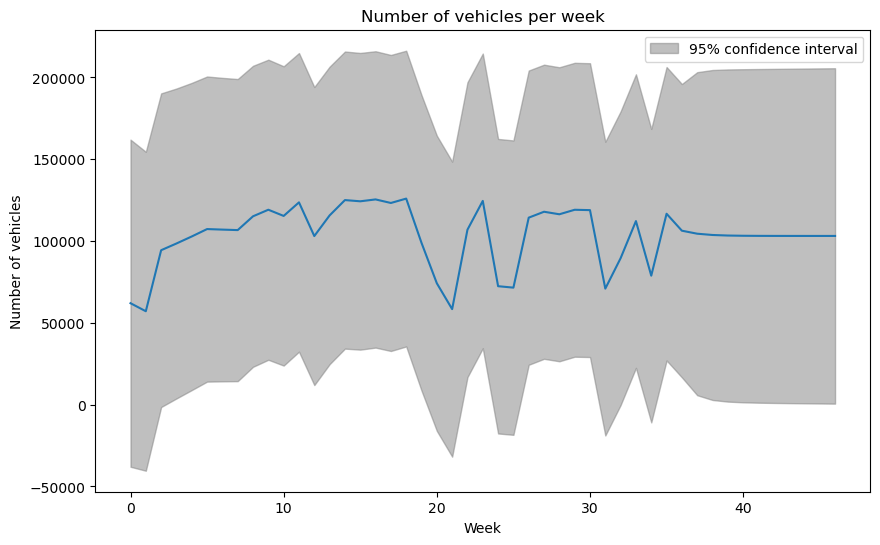

In [100]:
plot_predict(model_fit, start=1, end=47)
plt.xlabel('Week')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles per week')